In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import matplotlib.font_manager as fm

# Find and select a specific font family
font_family = 'serif'
font_path = fm.findfont(fm.FontProperties(family=font_family))

In [39]:
sns.set_theme()

In [18]:
time_comm = pd.concat([pd.read_csv('make_results/time_comm_2.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"]), pd.read_csv('make_results/time_comm.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"])], ignore_index=True)
time_comm_acc = pd.concat([pd.read_csv('makeacc_results/time_comm_2.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"]), pd.read_csv('makeacc_results/time_comm.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"])], ignore_index=True)
time_comp = pd.concat([pd.read_csv('make_results/time_comp_2.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"]), pd.read_csv('make_results/time_comp.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"])], ignore_index=True)
time_comp_acc = pd.concat([pd.read_csv('makeacc_results/time_comp_2.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"]), pd.read_csv('makeacc_results/time_comp.dat', delimiter='\t',names=["rank", "size","dim", "iterations","time"])], ignore_index=True)

In [22]:
time_comm_mean={10000:{1:None,2:None,5:None,8:None,10:None},
                20000:{1:None,2:None,5:None,8:None,10:None}}
time_comp_mean={10000:{1:None,2:None,5:None,8:None,10:None},
                20000:{1:None,2:None,5:None,8:None,10:None}}
time_comm_acc_mean={10000:{1:None,2:None,5:None,8:None,10:None},
                    20000:{1:None,2:None,5:None,8:None,10:None}}
time_comp_acc_mean={10000:{1:None,2:None,5:None,8:None,10:None},
                    20000:{1:None,2:None,5:None,8:None,10:None}}

for dim in [10000, 20000]:
    for k in [1,2,5,8,10]:
        time_comm_mean[dim][k] = np.mean(
            [time_comm["time"][i] for i in range(len(time_comm)) 
             if np.logical_and(time_comm["size"][i]==k, time_comm["dim"][i]==dim)]) 

        time_comp_mean[dim][k] = np.mean(
            [time_comp["time"][i] for i in range(len(time_comp)) 
             if np.logical_and(time_comp["size"][i]==k, time_comp["dim"][i]==dim)]) 

        time_comm_acc_mean[dim][k] = np.mean(
            [time_comm_acc["time"][i] for i in range(len(time_comm_acc)) 
             if np.logical_and(time_comm_acc["size"][i]==k, time_comm_acc["dim"][i]==dim)]) 

        time_comp_acc_mean[dim][k] = np.mean(
            [time_comp_acc["time"][i] for i in range(len(time_comp_acc)) 
             if np.logical_and(time_comp_acc["size"][i]==k, time_comp_acc["dim"][i]==dim)])  

In [32]:
def plot_bars(data_dict, dim, label="Communication Time", n_bars=1, pos=1, color="green"):
    width=0.3
    plt.bar([1+pos*width/n_bars,2+pos*width/n_bars,5+pos*width/n_bars,10+pos*width/n_bars],
            [data_dict[dim][i] for i in [1,2,5,10]], 
            color=color, label=label,width=width)
    return plt

In [41]:
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

In [52]:
dim_=10000

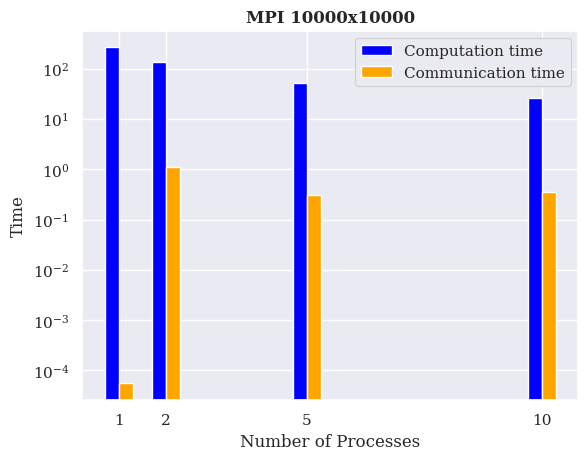

In [53]:
plot_bars(time_comp_mean,dim_, label="Computation time", color="blue",pos=-1,n_bars=2)
plot_bars(time_comm_mean,dim_, label="Communication time", color="orange",pos=1, n_bars=2)
plt.xticks([1,2,5,10])
plt.yscale('log')
plt.legend()
plt.title(f"MPI {dim_}x{dim_}",fontweight='bold')
plt.xlabel("Number of Processes",fontweight=500)
plt.ylabel("Time",fontweight=500)
plt.savefig(f"MPI{dim_}.png")

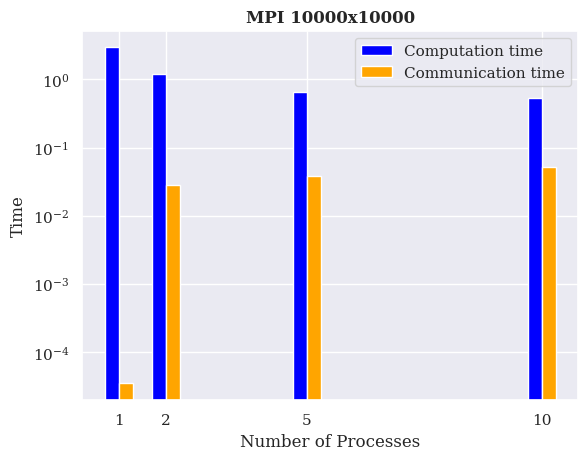

In [54]:
plot_bars(time_comp_acc_mean,dim_, label="Computation time", color="blue",pos=-1,n_bars=2)
plot_bars(time_comm_acc_mean,dim_, label="Communication time", color="orange",pos=1, n_bars=2)
plt.xticks([1,2,5,10])
plt.yscale('log')
plt.legend()
plt.title(f"MPI {dim_}x{dim_}",fontweight='bold')
plt.xlabel("Number of Processes",fontweight=500)
plt.ylabel("Time",fontweight=500)
plt.savefig(f"MPI{dim_}.png")

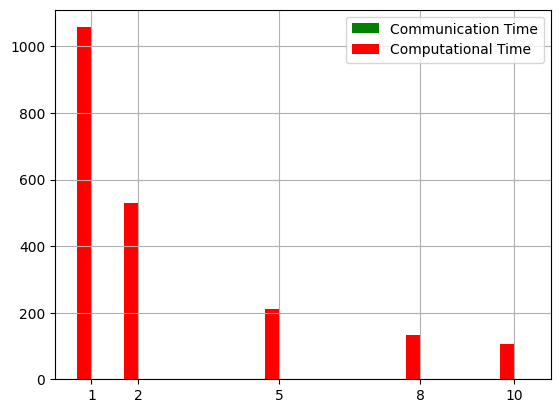

In [4]:
width=0.3
plt.bar([1+width/2,2+width/2,5+width/2,8+width/2,10+width/2],[time_comm_mean[i] for i in range(5)], color="green", label="Communication Time", width=width)
plt.bar([1-width/2,2-width/2,5-width/2,8-width/2,10-width/2],time_comp_mean, color="red",label="Computational Time", width=width)
plt.grid()
plt.xticks([1,2,5,8,10])
plt.legend()
plt.show()

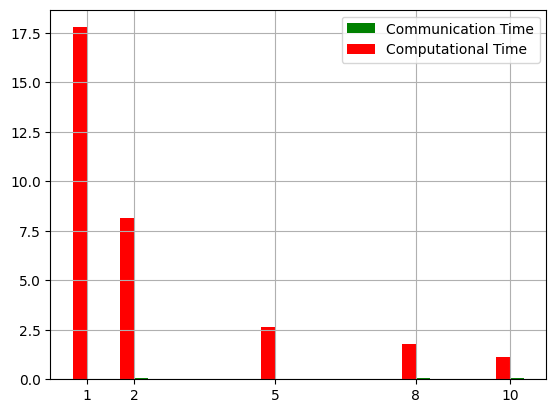

In [5]:
width=0.3
plt.bar([1+width/2,2+width/2,5+width/2,8+width/2,10+width/2],[time_comm_acc_mean[i] for i in range(5)], color="green", label="Communication Time", width=width)
plt.bar([1-width/2,2-width/2,5-width/2,8-width/2,10-width/2],time_comp_acc_mean, color="red",label="Computational Time", width=width)
plt.grid()
plt.xticks([1,2,5,8,10])
plt.legend()
plt.show()